# Multi Modal Feature Fusion using Autoencoders

## Problem formulation

Traditional models (like RFM) rely on snapshots. They see what a customer spent last month and what's their profile but miss out completely on the **trajectory** of where they are going. 

**Question**: How do you distinguish a loyal customer on a seasonal break from an identical to a customer about to churn?

**Question**: How do you distinguish customers with a similar cross sectional profile, but different trajectories?

**Question**: Are all customers transitions possible? Do they lie on a continuous space or each customer lies on a narrowly defined spectrum of state spaces with transition probabilities?

## The Domain Spaces

We define the input space $\mathcal{X}$ as a product of two subspaces:

$$
\mathcal{X} = \mathcal{S} \times \mathcal{T}
$$

Where:

* $\mathcal{S} \in \mathbb{R}^{d_s}$: Static demographic space (slowly changing) - who are they?
* $\mathcal{T} \in \mathbb{R}^{d_t \times L}$: Temporal sequence space (dynamic) - where are they going? what are their preferences at time t?.

The objective is to find an embedding function to the latent space Z.

$$
\phi: \mathcal{X} \to \mathcal{Z}
$$

By processing these different data granularities simultaneously, we create a **Customer DNA** (Embedding) that captures **identity** and **evolution** in a single representation.

## Autoencoder-Based Dimensionality Reduction

A Multi-Modal CNN Autoencoder serves as a non-linear low dimensional projection, but with a critical distinction: it learns a curved manifold rather than a linear hyperplane.

### Constraint 1: Hyperspherical Projection

When embeddings are normalized to unit length, they lie on a hypersphere:

$$
\mathcal{S}^{d-1} = \left\{ \mathbf{z} \in \mathbb{R}^d : \|\mathbf{z}\|_2 = 1 \right\}
$$

The distance between two points on the hypersphere is measured by **geodesic (arc) distance**:

$$
d_{\text{geo}}(\mathbf{z}_1, \mathbf{z}_2) = \arccos(\mathbf{z}_1 \cdot \mathbf{z}_2)
$$

Or equivalently, using **cosine similarity**:

$$
\text{sim}(\mathbf{z}_1, \mathbf{z}_2) = \frac{\mathbf{z}_1 \cdot \mathbf{z}_2}{\|\mathbf{z}_1\| \|\mathbf{z}_2\|} = \mathbf{z}_1 \cdot \mathbf{z}_2 \quad \text{(when normalized)}
$$

| Metric | Customer A (Business) | Customer C (Executive) |
|--------|----------------------|------------------------|
| Annual Spend | $15,000 | $45,000 |
| Flights/Year | 80 | 60 |
| Avg Distance | 500 mi | 6,000 mi |
| Loyalty Tier | Aurora | Star |
| **Euclidean Distance** | **~30,000** | **(completely different)** |
| **Cosine Similarity** | **0.92** | **(almost identical)** |

**Behavioral Profile (Normalized):**

| Feature | Customer A | Customer C |
|---------|-----------|-----------|
| Flight Frequency | High ✓ | High ✓ |
| Booking Pattern | Consistent ✓ | Consistent ✓ |
| Travel Days | Weekday-heavy ✓ | Weekday-heavy ✓ |
| Booking Channel | Corporate ✓ | Corporate ✓ |


### Constraint 2: The Loss Function

$$
\mathcal{L} = \alpha \mathcal{L}_{\text{static}} + \beta \mathcal{L}_{\text{temporal}} + \gamma \mathcal{L}_{\text{contrastive}} + \delta \mathcal{L}_{\text{velocity}}
$$

1. $\mathcal{L}_{\text{static}}$ & $\mathcal{L}_{\text{temporal}}$ (Reconstruction): Ensures $\mathcal{Z}$ retains enough information to map back to $\mathcal{X}$ (customer cross sectional profile) and forecasting next temporal values.

2. $\mathcal{L}_{\text{contrastive}}$ (Topology): Forces points that are semantically similar to be locally connected on the manifold, preventing the "collapse" of the latent space.

3. $\mathcal{L}_{\text{velocity}}$ (The Differential): By penalizing errors in the gradient of the data ($\frac{dx}{dt}$), we are learning customer velocity vector (where it's changing to and how strongly).

## Clustering on the latent space

Because of the intrinsic definition of our latent space, **we are clustering on tangent vectors (locality + velocity)** not just on positional vectors (customer cross section) which traditional clustering does.

* **Traditional Feature-Based Clustering:**

$$
C_{\text{trad}} = \left\{ x \mid \|x - \mu\| < \epsilon \right\}
$$

   * **Result**: Clusters based on Customer spending (low spending indicates Churn risk, high spending indicates acquisition/take off). For two customers that spend 1000 -> 100, and the other that spends 100 -> 1000, these will occupy the same average space/cluster when in reality they have two completely difference behavior trajectories.

* **Latent Phase Space Clustering:**

$$
C_{\text{phase}} = \left\{ (z, v) \mid d_{\mathcal{M}}(z, \mu_z) + \lambda \|v - \mu_v\| < \epsilon \right\}
$$

   * **Result**: The Churner and the Acquired user are topologically separated because their **velocity vectors $v$ point in opposite directions** (cosine similarity = -1), despite their positions $z$ being close.

## Clustering results

After running elbow method on KMeans using cosine distance (best value: 19.92)

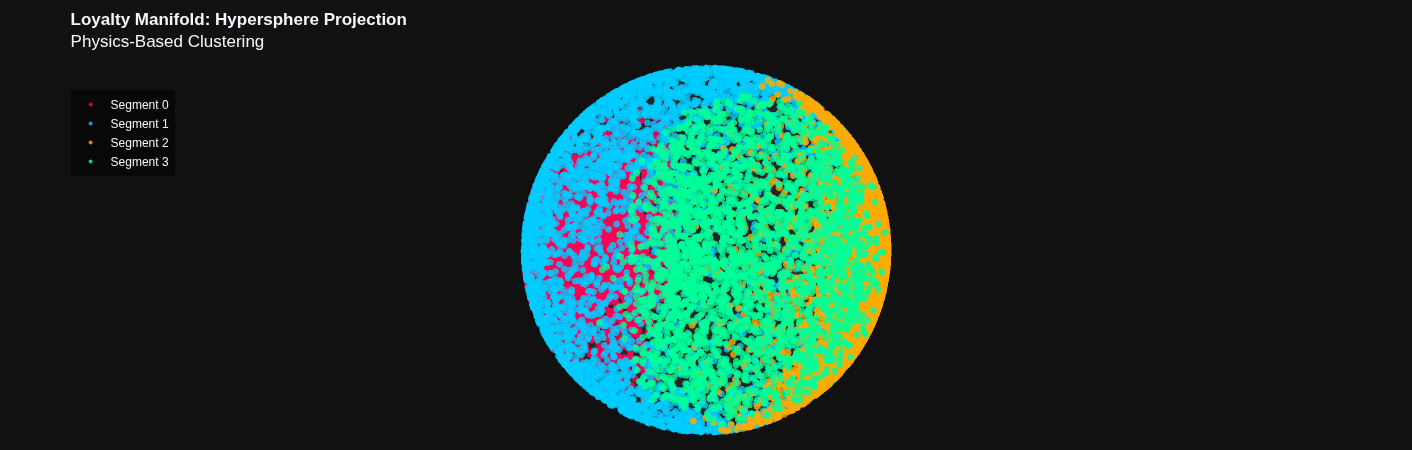

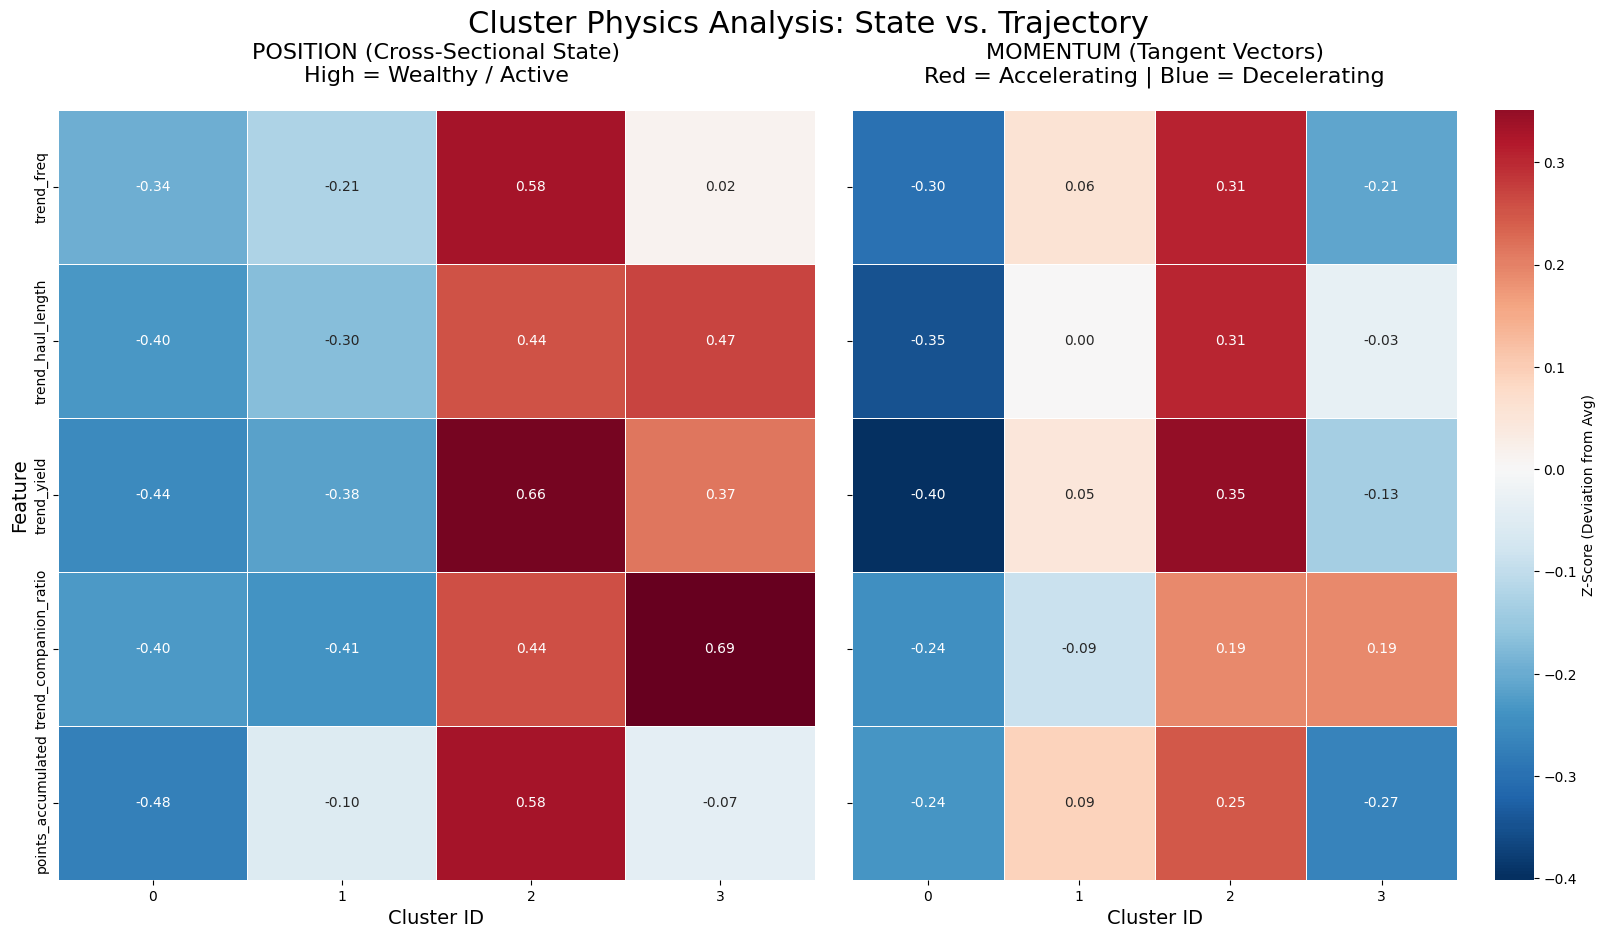

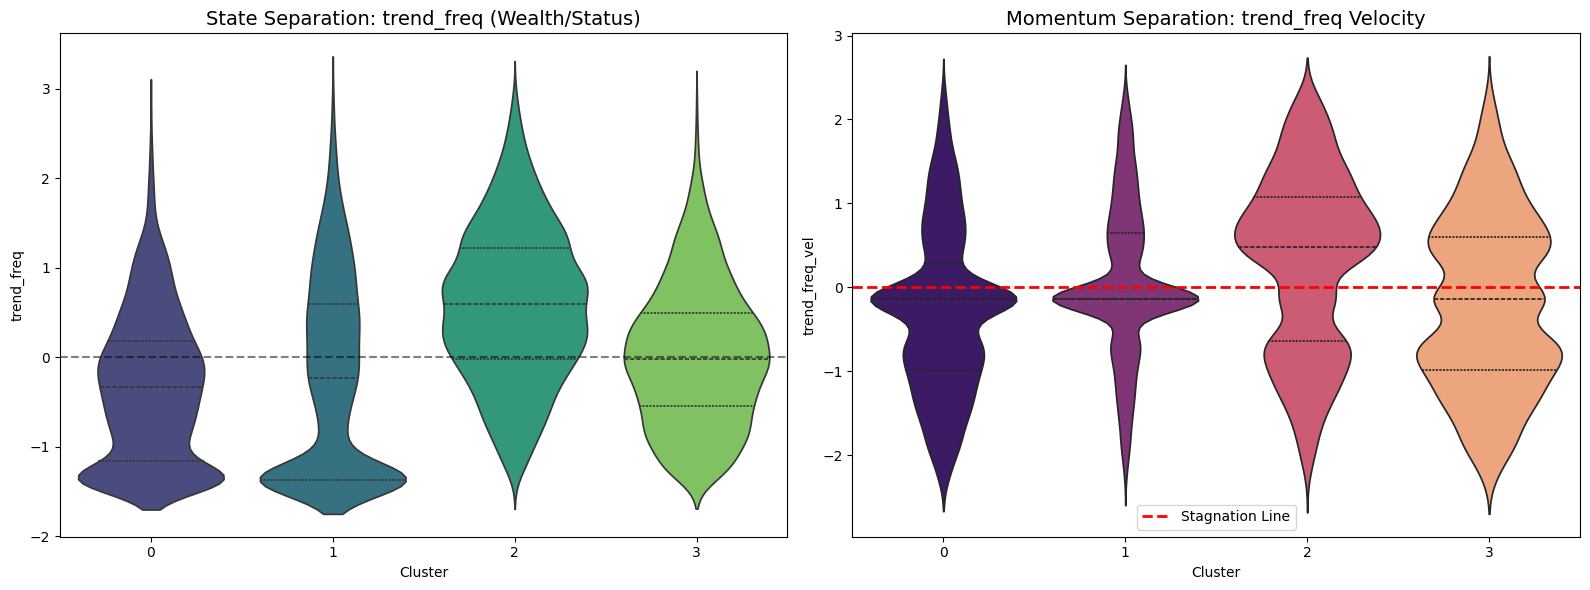


## Analysis of the results and conclusion

# Cluster Profiles: State + Velocity Analysis

---

## 1. 🔵 Cluster 0: (Low Value, Decelerating)

| Dimension | State | Velocity | Interpretation |
|-----------|-------|----------|----------------|
| **Signature** | 🔵 Deep Blue | ⬇️ Negative | Active churn |
| **Frequency** | -0.34σ | -0.30σ | ↓ Flying less |
| **Points** | -0.48σ | Negative | ↓ Disengaging |
| **Profile** | Lowest engagement | Dying momentum | Dormancy/churn |

**Strategic Action: Win-Back or Let Go**
- ❌ Nudging won't work (momentum too negative)
- ✅ Shock offer required ($100 "We miss you")
- ⚠️ No response → stop spending
---

## 2. ⚪ Cluster 1: (Mass Market)

| Dimension | State | Velocity | Interpretation |
|-----------|-------|----------|----------------|
| **Signature** | 🟦 Light Blue | ⏸️ Neutral | Static behavior |
| **Frequency** | -0.21σ | +0.06σ | → 1-2x/year stable |
| **Haul** | -0.30σ | 0.00σ | → No change |
| **Profile** | Below average | Zero momentum | Predictable orbit |

**Strategic Action: Efficiency & Ancillaries**
- ❌ Won't fly more frequently
- ✅ Monetize existing flights (seats, bags)
- ⚠️ Keep warm, don't over-invest in perks
---

## 3. 🔴 Cluster 2: (High Value, Accelerating)

| Dimension | State | Velocity | Interpretation |
|-----------|-------|----------|----------------|
| **Signature** | 🔴 Deep Red | 🟠 Positive | Growing momentum |
| **Frequency** | +0.58σ | +0.31σ | ↑ Flying more |
| **Yield** | +0.66σ | +0.35σ | ↑ Spending more |
| **Profile** | Top-tier customer | Still growing | Business traveler in expansion |

**Strategic Action: Zero-Friction Service**
- ❌ No "Buy More" offers (already buying naturally)
- ✅ Focus on retention via experience
- ✅ Ensure upgrades clear, bags first, app stability

## 4. ☄️ Cluster 3: (Hidden Risk / Vacationer)

| Dimension | State | Velocity | Interpretation |
|-----------|-------|----------|----------------|
| **Signature** | 🔴 High State | ⬇️ Negative | Post-vacation crash |
| **Haul Length** | +0.47σ | — | Long international trip |
| **Companion** | +0.69σ | — | Family vacation |
| **Yield** | +0.37σ | — | Expensive trip |
| **Frequency** | — | -0.21σ | ↓ Stopped flying |
| **Points** | — | -0.27σ | ↓ Disengaging |

**Strategic Action: Next Trip Trigger**
- ❌ Don't treat like business travelers
- ✅ "Dream Destination" offers (12mo window)
- ✅ Hotel/car rentals (capture vacation wallet)
- ✅ Push next big event, NOT frequency

      

## 1. Setup and Configuration

In [3]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import ceil
from scipy.stats import skew
from scipy.interpolate import make_interp_spline
import random
import duckdb

# Machine Learning
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# Deep Learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Dimensionality Reduction
import umap.umap_ as umap

# Visualization
import matplotlib.gridspec as gridspec

warnings.filterwarnings('ignore')
print("📦 All libraries imported successfully")

/home/miguel/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 All libraries imported successfully


In [4]:
# === CONFIGURATION PARAMETERS ===

# Data Processing
RANDOM_STATE = 42
TIME_STEPS = 18  # Number of months to use for temporal features
SAMPLE_SIZE = 50000  # For visualization sampling

# Model Architecture
LATENT_DIM = 24
BATCH_SIZE = 128
LEARNING_RATE = 0.002
EPOCHS = 60

# Training Parameters
MIN_HISTORY = 14
MAX_HISTORY = 17
STATIC_LOSS_WEIGHT = 1.0
TEMPORAL_LOSS_WEIGHT = 1.0
CONTRASTIVE_LOSS_WEIGHT = 1.0

# Clustering
N_CLUSTERS = 8
CLUSTER_RANGE = range(3, 20)
UMAP_NEIGHBORS = 10
UMAP_MIN_DIST = 0.02

VELOCITY_WEIGHT = 3.0  # How much more important is "Where you're going" vs "Where you are"?
N_CLUSTERS = 4         # Rocket, Meteor, Orbit, Gravity Well

# Visualization
FIGURE_SIZE = (12, 6)
DPI = 100

# File Paths
FLIGHTS_CSV_PATH = "data/DM_AIAI_FlightsDB.csv"
CUSTOMER_CSV_PATH = "DM_AIAI_CustomersDB_after_eda.csv"
DATABASE_PATH = "/home/miguel/NOVA Classes/Data Mining/airline_analytics.duckdb"

# Plotting Configuration
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = FIGURE_SIZE
plt.rcParams['figure.dpi'] = DPI

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set random seeds for reproducibility
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


## 2. Data Loading Functions

In [5]:
# === DATA LOADING FUNCTIONS ===

def load_static_customer_data():
    """
    Load static customer profile data from DuckDB
    """
    print("Connecting to DuckDB database...")
    conn = duckdb.connect(DATABASE_PATH)
    
    # Install and load spatial extension
    conn.execute("INSTALL spatial;")
    conn.execute("LOAD spatial;")
    
    # Load customer profile data
    query = """
    SELECT 
        *
    FROM fct_customer_profile_analysis
    """
    
    df_static = conn.execute(query).df()
    
    # Clean up connection
    conn.close()
    
    print(f"Static data loaded: {len(df_static):,} records")
    print(f"Unique customers: {df_static['loyalty_id'].nunique():,}")
    print(f"Memory usage: {df_static.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df_static


import pandas as pd
import numpy as np
import duckdb

def load_static_customer_data(customer_path):
    """
    Load static customer profile data.
    Strictly restricted to Demographics and Tenure.
    Behavioral aggregates (Yield, Companions) are removed to avoid redundancy/leakage.
    """
    print("Loading static profiles...")
    df_static = pd.read_csv(customer_path)
    
    # Standardize ID
    if 'Loyalty#' in df_static.columns:
        df_static.rename(columns={'Loyalty#': 'loyalty_id'}, inplace=True)

    # 1. Tenure Calculation (Background Condition)
    df_static['Tenure_Years'] = np.maximum(df_static['CustomerTenure'], 1) / 365.0

    # 2. Economical Proxy (Wallet Share)
    # This remains static because Income and CLV (usually) don't have monthly granularity in this dataset
    df_static['Share_Of_Wallet'] = np.where(
        df_static['Income'] > 0, 
        df_static['Customer Lifetime Value'] / df_static['Income'], 
        0
    )

    # --- REMOVED AGGREGATIONS ---
    # We deleted Total_Flights, Luxury_Index, Avg_Haul, etc. 
    # These will now be tracked temporally in the flight loader.

    # Keep only true static/demographic columns
    keep_cols = [
        'loyalty_id', 'Tenure_Years', 'Share_Of_Wallet', 
        'Income', 'Marital Status', 'Province or State', 
        'Education', 'LoyaltyStatus', 'EnrollmentType'
        # Add any other true static columns from your CSV
    ]
    
    # Filter columns that actually exist
    existing_cols = [c for c in keep_cols if c in df_static.columns]
    df_final = df_static[existing_cols].copy()

    print(f"Static Data Loaded: {df_final.shape} - Pure Demographics")
    return df_final


def load_flights_from_csv(csv_path):
    """
    Load flight data and compute DYNAMIC behavioral vectors.
    """
    print("Loading and engineering temporal flight data...")
    
    df = pd.read_csv(csv_path)
    
    # --- STEP 1: BASE AGGREGATION ---
    df_clean = df.groupby(['Loyalty#', 'Year', 'Month']).agg({
        'NumFlights': 'sum',
        'NumFlightsWithCompanions': 'sum', 
        'DistanceKM': 'sum',
        'PointsAccumulated': 'sum',
        'PointsRedeemed': 'sum',
        'YearMonthDate': 'first'
    }).reset_index()
    
    df_clean = df_clean.rename(columns={
        'Loyalty#': 'loyalty_id',
        'NumFlights': 'num_flights',
        'DistanceKM': 'distance_km',
        'PointsAccumulated': 'points_accumulated',
        'NumFlightsWithCompanions': 'num_flights_with_companions'
    })
    
    df_clean['activity_month'] = pd.to_datetime(df_clean['YearMonthDate'])
    
    # --- STEP 2: DYNAMIC BEHAVIORAL PROXIES (The New Logic) ---
    
    # A. Yield (Luxury Proxy) - Dynamic
    # How much is this specific trip worth?
    df_clean['monthly_yield'] = np.where(
        df_clean['distance_km'] > 0,
        df_clean['points_accumulated'] / df_clean['distance_km'],
        0.0
    )
    
    # B. Travel Style (Avg Haul) - Dynamic
    # Was this month long-haul or short-haul?
    df_clean['monthly_avg_haul'] = np.where(
        df_clean['num_flights'] > 0,
        df_clean['distance_km'] / df_clean['num_flights'],
        0.0
    )
    
    # C. Companion Intensity - Dynamic
    # Did they fly with family this month?
    df_clean['monthly_companion_ratio'] = np.where(
        df_clean['num_flights'] > 0,
        df_clean['num_flights_with_companions'] / df_clean['num_flights'],
        0.0
    )
    
    # --- STEP 3: SMOOTHING (The "Trend" Vector) ---
    # We smooth these proxies over 3 months so the "Velocity" calculation
    # (Step 2 of the Phase Space Builder) captures trends, not noise.
    
    df_clean = df_clean.sort_values(['loyalty_id', 'activity_month'])
    
    rolling_cols = ['monthly_yield', 'monthly_avg_haul', 'monthly_companion_ratio', 'num_flights']
    
    # Calculate rolling means
    df_rolling = (
        df_clean.groupby('loyalty_id')[rolling_cols]
        .rolling(window=3, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
    
    # Rename for clarity
    df_rolling.columns = [
        'trend_yield', 'trend_haul_length', 'trend_companion_ratio', 'trend_freq'
    ]
    
    # Join back
    df_final = pd.concat([df_clean, df_rolling], axis=1)
    
    # --- STEP 4: SEASONALITY ---
    df_final['month_num'] = df_final['activity_month'].dt.month
    df_final['is_summer'] = df_final['month_num'].isin([6, 7, 8]).astype(int)
    df_final['is_winter'] = df_final['month_num'].isin([12, 1, 2]).astype(int)

    # Final Feature Selection
    # Note: We keep the TREND columns for the model, not the raw monthly spikes
    feature_cols = [
        'loyalty_id', 'activity_month',
        'trend_freq',               # Activity
        'trend_haul_length',        # Style
        'trend_yield',              # Luxury
        'trend_companion_ratio',    # Social
        'points_accumulated',       # Value (keep raw for magnitude)
        'is_summer', 'is_winter'    # Seasonality
    ]
    
    return df_final[feature_cols]

In [6]:
# === UTILITY FUNCTIONS ===


def preprocess_zero_inflated(df, columns):
    """
    Apply quantile transformation to zero-inflated columns
    """
    df_out = df.copy()
    qt = QuantileTransformer(output_distribution='normal', random_state=RANDOM_STATE)
    
    for col in columns:
        # Create Binary Flag
        df_out[f'{col}_flag'] = (df_out[col] > 0).astype(int)
        
        # Apply transformation
        if (df_out[col] < 0).any():
            data_to_scale = df_out[[col]]
        else:
            data_to_scale = np.log1p(df_out[[col]])
        
        df_out[f'{col}_scaled'] = qt.fit_transform(data_to_scale)
        
    return df_out

print("Utility functions defined")

Utility functions defined


## 3. Load and Process Data

In [7]:
# === LOAD STATIC CUSTOMER PROFILE ===

print("Loading static customer profile data...")
df_static = load_static_customer_data(CUSTOMER_CSV_PATH)

# Display basic info
print("\n=== STATIC DATASET OVERVIEW ===")
print(df_static.info())

Loading static customer profile data...
Loading static profiles...
Static Data Loaded: (16574, 9) - Pure Demographics

=== STATIC DATASET OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16574 entries, 0 to 16573
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loyalty_id         16574 non-null  int64  
 1   Tenure_Years       16574 non-null  float64
 2   Share_Of_Wallet    16574 non-null  float64
 3   Income             16574 non-null  float64
 4   Marital Status     16574 non-null  object 
 5   Province or State  16574 non-null  object 
 6   Education          16574 non-null  object 
 7   LoyaltyStatus      16574 non-null  object 
 8   EnrollmentType     16574 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.1+ MB
None


In [8]:
# === LOAD LONGITUDINAL FLIGHT DATA ===

df_flights = load_flights_from_csv(FLIGHTS_CSV_PATH)

print(f"Flight data loaded: {len(df_flights):,} records")
print(f"Unique customers: {df_flights['loyalty_id'].nunique():,}")
print(f"Memory usage: {df_flights.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== FLIGHT DATASET OVERVIEW ===")
print(df_flights.info())

Loading and engineering temporal flight data...
Flight data loaded: 602,532 records
Unique customers: 16,737
Memory usage: 41.37 MB

=== FLIGHT DATASET OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602532 entries, 0 to 602531
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   loyalty_id             602532 non-null  int64         
 1   activity_month         602532 non-null  datetime64[ns]
 2   trend_freq             602532 non-null  float64       
 3   trend_haul_length      602532 non-null  float64       
 4   trend_yield            602532 non-null  float64       
 5   trend_companion_ratio  602532 non-null  float64       
 6   points_accumulated     602532 non-null  float64       
 7   is_summer              602532 non-null  int64         
 8   is_winter              602532 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 41.

## 4. Model Architecture

In [9]:
# === MODEL DEFINITION ===

class CNNMultiModalAutoencoder(nn.Module):
    def __init__(self, static_dim, seq_len, temporal_dim, latent_dim=LATENT_DIM):
        super(CNNMultiModalAutoencoder, self).__init__()
        
        self.seq_len = seq_len
        self.temporal_dim = temporal_dim
        
        # --- ENCODER ---
        
        # STATIC: Process fixed attributes
        self.static_enc = nn.Sequential(
            nn.Linear(static_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # TEMPORAL: Process State + Velocity (Phase Space)
        # Note: input_channels will be 2x original if you use Phase Space data
        self.temporal_cnn = nn.Sequential(
            nn.Conv1d(in_channels=temporal_dim, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2), 
            
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2)  
        )
        
        # Flatten size calculation
        self.cnn_flat_size = 128 * (seq_len // 4) 
        
        # FUSION (Bottleneck)
        # We remove Tanh here because we will use L2 Normalization
        self.fusion = nn.Linear(32 + self.cnn_flat_size, latent_dim)
        
        # --- DECODER ---
        
        self.static_dec = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, static_dim)
        )
        
        self.temporal_dec_map = nn.Linear(latent_dim, self.cnn_flat_size)
        
        self.temporal_cnn_dec = nn.Sequential(
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            
            # Output channels match input (State + Velocity)
            nn.ConvTranspose1d(64, temporal_dim, kernel_size=4, stride=2, padding=1)
        )

    def encode(self, x_static, x_temporal):
        """Helper to get just the Z vector (Normalized)"""
        x_t_permuted = x_temporal.permute(0, 2, 1)
        
        s_emb = self.static_enc(x_static)
        t_feat = self.temporal_cnn(x_t_permuted)
        t_flat = t_feat.view(t_feat.size(0), -1) 
        
        combined = torch.cat((s_emb, t_flat), dim=1)
        
        # Linear projection
        z_raw = self.fusion(combined)
        
        # HYPERSPHERE PROJECTION (L2 Normalization)
        # This projects every point onto the surface of the sphere
        z = F.normalize(z_raw, p=2, dim=1)
        
        return z

    def decode(self, z):
        """Decodes Z back to data space"""
        # Decode Static
        recon_static = self.static_dec(z)
        
        # Decode Temporal
        t_map = self.temporal_dec_map(z)
        t_reshaped = t_map.view(t_map.size(0), 128, self.seq_len // 4)
        recon_t_permuted = self.temporal_cnn_dec(t_reshaped)
        
        # Handle interpolation
        if recon_t_permuted.shape[2] != self.seq_len:
            recon_t_permuted = F.interpolate(
                recon_t_permuted, size=self.seq_len, mode='linear', align_corners=False
            )
        
        recon_temporal = recon_t_permuted.permute(0, 2, 1)
        return recon_static, recon_temporal

    def forward(self, x_static, x_temporal):
        # 1. Encode & Normalize
        z = self.encode(x_static, x_temporal)
        
        # 2. Decode
        recon_static, recon_temporal = self.decode(z)
        
        # Return Z for use in loss functions or saving
        return recon_static, recon_temporal, z


def nt_xent_loss(z1, z2, temperature=0.5):
    """
    Normalized Temperature-scaled Cross Entropy Loss (SimCLR).
    """
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)
    
    similarity_matrix = torch.matmul(z1, z2.T) / temperature
    batch_size = z1.shape[0]
    labels = torch.arange(batch_size).to(z1.device)
    
    loss = F.cross_entropy(similarity_matrix, labels)
    return loss

In [10]:

def build_phase_space_dataset(df_static, df_flights, feature_list, time_steps=12):
    """
    Builds a 'Phase Space' dataset.
    Inputs: Raw features.
    Outputs: Features + Velocity (Deltas) to capture momentum.
    """
    print("--- Step 1: Alignment & Cleanup ---")
    
    # ID Standardization
    if 'Loyalty#' in df_static.columns: df_static = df_static.rename(columns={'Loyalty#': 'loyalty_id'})
    if 'Loyalty#' in df_flights.columns: df_flights = df_flights.rename(columns={'Loyalty#': 'loyalty_id'})

    df_s_clean = df_static.drop_duplicates(subset=['loyalty_id'], keep='last').copy()
    
    # Intersection
    common_ids = set(df_s_clean['loyalty_id']).intersection(set(df_flights['loyalty_id']))
    df_f_clean = df_flights[df_flights['loyalty_id'].isin(common_ids)].copy()
    
    # Activity Month Logic
    if 'activity_month' not in df_f_clean.columns:
        if 'Year' in df_f_clean.columns and 'Month' in df_f_clean.columns:
             df_f_clean['activity_month'] = pd.to_datetime(df_f_clean[['Year', 'Month']].assign(DAY=1))
        elif 'YearMonthDate' in df_f_clean.columns:
             df_f_clean['activity_month'] = pd.to_datetime(df_f_clean['YearMonthDate'])

    df_f_clean = df_f_clean.sort_values(['loyalty_id', 'activity_month'])

    print(f"\n--- Step 2: Phase Space Construction (State + Velocity) ---")
    
    # 1. Enforce History Length
    required_rows = time_steps + 1
    
    df_f_clean = df_f_clean.groupby('loyalty_id').tail(required_rows)
    row_counts = df_f_clean.groupby('loyalty_id').size()
    
    valid_ids = sorted(row_counts[row_counts == required_rows].index.tolist())
    df_f_final = df_f_clean[df_f_clean['loyalty_id'].isin(valid_ids)].sort_values(['loyalty_id', 'activity_month'])
    
    # 2. Calculate Velocity (First Order Difference)
    # Note: We assume 'feature_list' contains the SMOOTHED trends (trend_yield, etc.)
    # so diff() gives us a clean trend vector, not noise.
    velocity_features = df_f_final.groupby('loyalty_id')[feature_list].diff()
    
    # Rename columns to distinguish State from Velocity
    velocity_features.columns = [f"{col}_velocity" for col in feature_list]
    
    # Combine State + Velocity
    df_phase_space = pd.concat([df_f_final[feature_list], velocity_features], axis=1)
    
    # Drop the first row per customer (NaN velocity)
    df_phase_space = df_phase_space.dropna()
    
    # 3. Robust Scaling (Critical for Phase Space)
    # A. Scale the STATE features (Values) using RobustScaler (Preserves Magnitude nuances)
    # We want to know if someone is a "High Spender" (Magnitude matters)
    state_scaler = RobustScaler()
    X_state = state_scaler.fit_transform(df_phase_space[feature_list])
    
    # B. Scale the VELOCITY features (Deltas) using QuantileTransformer (Squashes Outliers)
    # We want to know the "Direction/Momentum", but we don't want spikes to kill the loss.
    # output_distribution='normal' forces it into a Bell Curve.
    velocity_cols = velocity_features.columns
    vel_scaler = QuantileTransformer(output_distribution='normal')
    X_velocity = vel_scaler.fit_transform(df_phase_space[velocity_cols])
    
    # C. Recombine
    X_phase_flat = np.hstack([X_state, X_velocity])
    
    # Reshape
    num_features = len(feature_list) * 2 
    X_temporal = X_phase_flat.reshape(len(valid_ids), time_steps, num_features)

    print(f"Valid Customers: {len(valid_ids)}")

    print("\n--- Step 3: Static Data (Pure Demographics) ---")
    
    df_s_final = df_s_clean.set_index('loyalty_id').loc[valid_ids].reset_index()
    
    # UPDATED: Only use columns present in the new 'load_static_customer_data'
    cat_cols = ['Education', 'Marital Status', 'LoyaltyStatus', 'EnrollmentType', 'Province or State']
    
    # UPDATED: Only skew-transform the Demographic financials
    # We removed Flights_Per_Year, Luxury_Index etc. as they are now Temporal
    skewed_num_cols = [
        'Income', 
        'Tenure_Years', 
        'Share_Of_Wallet' 
    ]
    
    # 1. Handle Categoricals
    # We filter cat_cols to ensure they exist in the dataframe
    present_cat_cols = [c for c in cat_cols if c in df_s_final.columns]
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = ohe.fit_transform(df_s_final[present_cat_cols].fillna('Unknown'))
    
    # 2. Handle Numericals (Yeo-Johnson)
    print(f"Applying Yeo-Johnson to static demographics...")
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    
    # Filter numeric cols to ensure existence
    present_num_cols = [c for c in skewed_num_cols if c in df_s_final.columns]
    transformed_nums = pt.fit_transform(df_s_final[present_num_cols].fillna(0))
    
    # 3. Binary Flags (Updated)
    # Only flag Share_Of_Wallet/Income zero status
    if 'Share_Of_Wallet' in df_s_final.columns:
        binary_flags = (df_s_final[['Share_Of_Wallet']].fillna(0) > 0).astype(int).values
        X_static = np.hstack([transformed_nums, binary_flags, encoded_cats])
    else:
        X_static = np.hstack([transformed_nums, encoded_cats])
    
    print(f"Temporal Input Shape (Phase Space): {X_temporal.shape}")
    print(f"Static Input Shape:                 {X_static.shape}")
    
    return X_static, X_temporal, valid_ids

## 5. Build Training Dataset

In [12]:
# === BUILD MULTIMODAL DATASET ===
temporal_features = [
    'trend_freq', 'trend_haul_length',
    'trend_yield', 'trend_companion_ratio', 
    'points_accumulated', 'is_summer',
    'is_winter'
]
print("Building multimodal dataset...")
X_static, X_temporal, valid_ids = build_phase_space_dataset(df_static, df_flights, temporal_features)

print(f"\n✅ Dataset prepared successfully")
print(f"📊 Final dataset: {len(valid_ids)} customers")
print(f"🔢 Static features: {X_static.shape[1]}")
print(f"⏰ Temporal features: {X_temporal.shape[2]} over {X_temporal.shape[1]} months")

Building multimodal dataset...
--- Step 1: Alignment & Cleanup ---

--- Step 2: Phase Space Construction (State + Velocity) ---
Valid Customers: 16574

--- Step 3: Static Data (Pure Demographics) ---
Applying Yeo-Johnson to static demographics...
Temporal Input Shape (Phase Space): (16574, 12, 14)
Static Input Shape:                 (16574, 28)

✅ Dataset prepared successfully
📊 Final dataset: 16574 customers
🔢 Static features: 28
⏰ Temporal features: 14 over 12 months


## 6. Model Training

In [13]:
# === MODEL TRAINING SETUP ===

# Convert to tensors
t_static = torch.from_numpy(X_static).float()
t_temporal = torch.from_numpy(X_temporal).float()

# Create DataLoader
dataset = TensorDataset(t_static, t_temporal)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize model
STATIC_DIM = X_static.shape[1]
SEQ_LEN = X_temporal.shape[1]
TEMPORAL_DIM = X_temporal.shape[2] 

print(f"Initializing model...")
print(f"Static dimension: {STATIC_DIM}")
print(f"Sequence length: {SEQ_LEN}")
print(f"Temporal dimension: {TEMPORAL_DIM}")
print(f"Latent dimension: {LATENT_DIM}")

model = CNNMultiModalAutoencoder(
    static_dim=STATIC_DIM,
    seq_len=SEQ_LEN,
    temporal_dim=TEMPORAL_DIM,
    latent_dim=LATENT_DIM
).to(device)

print(f"Running on device: {device}")

Initializing model...
Static dimension: 28
Sequence length: 12
Temporal dimension: 14
Latent dimension: 24
Running on device: cpu


In [14]:
# === MODEL TRAINING ===

def cosine_similarity_loss(z1, z2, temperature=0.1):
    # Normalize (already done by model)
    # z1 = F.normalize(z1, p=2, dim=1)
    # z2 = F.normalize(z2, p=2, dim=1)
    
    # Compute pairwise cosine similarities
    cos_sim = torch.matmul(z1, z2.T) # Similarity matrix
    
    # Mask out self-similarity (diagonal)
    labels = torch.arange(z1.size(0)).to(z1.device)
    mask = torch.eq(labels[:, None], labels[None, :]) # Creates a diagonal mask
    
    # Compute LogSoftmax over all pairs
    logits = cos_sim / temperature
    logits_max, _ = torch.max(logits, dim=1, keepdim=True)
    logits = logits - logits_max.detach() # For numerical stability
    
    # Contrastive loss calculation
    # Positive pairs (diagonal) should be high similarity, negative low
    # NT-Xent style: Loss = -log(exp(sim(i,j)/T) / sum(exp(sim(i,k)/T)))
    # For similarity (higher is better), we want to push positive pairs toward 1
    # and negative pairs toward -1.
    
    # Simplified (using dot product directly, assuming vectors are normalized)
    # This is the core idea: make positive pairs close (dot product ~1)
    # and negative pairs far (dot product ~-1)
    # loss = -torch.log(torch.sum(torch.exp(cos_sim * torch.exp(-labels)) / temperature)) # simplified
    
    # A standard implementation of InfoNCE/NT-Xent for similarity:
    # positives are z1[i] vs z2[i], negatives are z1[i] vs z2[j!=i]
    
    # Use a standard implementation for clarity.
    # Example: Simplified SimCLR-style contrastive loss
    logits_pos = torch.sum(z1 * z2, dim=1) # Positive pairs dot product
    logits_neg = torch.matmul(z1, z2.T)    # All pairs dot product
    
    # For positive pairs, we want high similarity (close to 1)
    # For negative pairs, we want low similarity (close to -1)
    
    # Loss for positive pairs (diagonal of logits_neg)
    loss_pos = -torch.log(torch.exp(logits_pos / temperature))
    
    # Loss for negative pairs (off-diagonal of logits_neg)
    # Exclude the diagonal itself
    exp_logits_neg = torch.exp(logits_neg / temperature)
    exp_logits_neg = exp_logits_neg * (1 - torch.eye(z1.size(0), device=z1.device)) # Zero out diagonal
    
    # Sum of negative similarities
    loss_neg = torch.log(torch.sum(exp_logits_neg, dim=1))
    
    # Total loss: average over batch size
    contrastive_loss = torch.mean(loss_pos + loss_neg)
    
    return contrastive_loss

# Optimizer and loss functions
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion_static = nn.MSELoss()
criterion_temporal = nn.L1Loss()

print("Starting model training...")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")

# === RECONFIGURED HYPERPARAMETERS ===
# Increase Temporal weight because we are about to make that task harder/more important
W_STATIC = 1.0      
W_TEMPORAL = 2.0  # <--- Increased to prioritize the "Velocity Tax"
W_CONTRASTIVE = 1.0 

# Velocity Penalty Multiplier
# How much more important is getting the TREND right vs getting the VALUE right?
VELOCITY_SCALE = 5.0 

optimizer = optim.Adam(model.parameters(), lr=0.002)

print("Training with Velocity-Weighted Loss & Modality Dropout...")

for epoch in range(EPOCHS): 
    model.train()
    epoch_loss = 0
    track_vel_loss = 0 # Track this specifically to see if it improves

    for batch_s, batch_t in dataloader:
        batch_s = batch_s.to(device).float()
        batch_t = batch_t.to(device).float()
        
        # Clamp outliers (Keep this from before)
        batch_t = torch.clamp(batch_t, min=-5.0, max=5.0)

        # =========================================
        # VIEW 1: STATIC RECONSTRUCTION
        # =========================================
        mask_s = torch.bernoulli(torch.full_like(batch_s, 0.7)).to(device)
        view1_s = batch_s * mask_s
        
        r_s1, r_t1, z1 = model(view1_s, batch_t)
        loss_s = criterion_static(r_s1, batch_s)

        # =========================================
        # VIEW 2: FORECASTING WITH "BLINDFOLD"
        # =========================================
        # 1. Temporal Mask (Standard Forecasting)
        cutoff = random.randint(5, 11) 
        time_mask = torch.zeros_like(batch_t).to(device)
        time_mask[:, :cutoff, :] = 1.0 
        view2_t = batch_t * time_mask 
        
        # 2. STATIC DROPOUT (The Structural Fix)
        # 50% of the time, we BLIND the static data completely.
        # This forces the model to use the Trajectory (view2_t) to define Z.
        if random.random() < 0.5:
            view2_s = torch.zeros_like(batch_s).to(device) # Total Blindfold
        else:
            view2_s = batch_s.clone() # Normal view
        
        r_s2, r_t2, z2 = model(view2_s, view2_t)
        
        # 3. VELOCITY-WEIGHTED LOSS (The Math Fix)
        # Split the output into State (Values) and Velocity (Deltas)
        # Assuming last dim is [State_Feats | Velocity_Feats]
        n_feats = batch_t.shape[2] // 2
        
        # State Loss (Normal weight)
        loss_state = criterion_temporal(r_t2[:,:,:n_feats], batch_t[:,:,:n_feats])
        
        # Velocity Loss (Heavily Penalized)
        # "If you get the trend wrong, it costs you 5x more"
        loss_velocity = criterion_temporal(r_t2[:,:,n_feats:], batch_t[:,:,n_feats:])
        
        # Combine
        loss_t = loss_state + (VELOCITY_SCALE * loss_velocity)

        # =========================================
        # VIEW 3: HYPERSPHERE ALIGNMENT
        # =========================================
        loss_c = nt_xent_loss(z1, z2)

        # =========================================
        # OPTIMIZATION
        # =========================================
        total_loss = (W_STATIC * loss_s) + (W_TEMPORAL * loss_t) + (W_CONTRASTIVE * loss_c)
        
        optimizer.zero_grad()
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        epoch_loss += total_loss.item()
        track_vel_loss += loss_velocity.item() # Monitor strictly the velocity error

    # Stats
    if (epoch + 1) % 5 == 0:
        n_batches = len(dataloader)
        print(f"Epoch [{epoch+1}/{EPOCHS}] Loss: {epoch_loss/n_batches:.4f} | Pure Vel Loss: {track_vel_loss/n_batches:.4f}")

Starting model training...
Epochs: 60
Batch size: 128
Learning rate: 0.002
Training with Velocity-Weighted Loss & Modality Dropout...
Epoch [5/60] Loss: 7.4038 | Pure Vel Loss: 0.3636
Epoch [10/60] Loss: 7.1249 | Pure Vel Loss: 0.3384
Epoch [15/60] Loss: 7.0371 | Pure Vel Loss: 0.3311
Epoch [20/60] Loss: 6.9666 | Pure Vel Loss: 0.3254
Epoch [25/60] Loss: 6.8848 | Pure Vel Loss: 0.3184
Epoch [30/60] Loss: 6.9329 | Pure Vel Loss: 0.3224
Epoch [35/60] Loss: 6.7668 | Pure Vel Loss: 0.3131
Epoch [40/60] Loss: 6.7312 | Pure Vel Loss: 0.3105
Epoch [45/60] Loss: 6.8168 | Pure Vel Loss: 0.3178
Epoch [50/60] Loss: 6.7538 | Pure Vel Loss: 0.3124
Epoch [55/60] Loss: 6.6698 | Pure Vel Loss: 0.3060
Epoch [60/60] Loss: 6.5969 | Pure Vel Loss: 0.3003


In [15]:
from sklearn.decomposition import PCA

# 1. Get all Z vectors
model.eval()
z_list = []
with torch.no_grad():
    for bs, bt in dataloader:
        bs, bt = bs.to(device).float(), bt.to(device).float()
        z = model.encode(bs, bt) # Use your encode helper
        z_list.append(z.cpu().numpy())
z_all = np.vstack(z_list)

# 2. Run PCA
pca = PCA().fit(z_all)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 3. Print
print("Cumulative Variance Explained by Component:")
print(cumulative_variance)

# 4. Check saturation
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nDimensions needed to explain 95% of data: {n_95}/{z_all.shape[1]}")

if n_95 >= z_all.shape[1] - 1:
    print("Verdict: BOTTLENECK SATURATED. Increase Latent Dim.")
else:
    print("Verdict: CAPACITY AVAILABLE. Latent Dim is sufficient.")

Cumulative Variance Explained by Component:
[0.20757477 0.28696606 0.35436878 0.4192473  0.4819019  0.5428937
 0.60155493 0.6583432  0.7119425  0.74549484 0.77651584 0.8072848
 0.8352841  0.8601057  0.88379467 0.90548104 0.9264263  0.9439244
 0.95763314 0.9707819  0.98141986 0.9892539  0.99538445 0.9999998 ]

Dimensions needed to explain 95% of data: 19/24
Verdict: CAPACITY AVAILABLE. Latent Dim is sufficient.


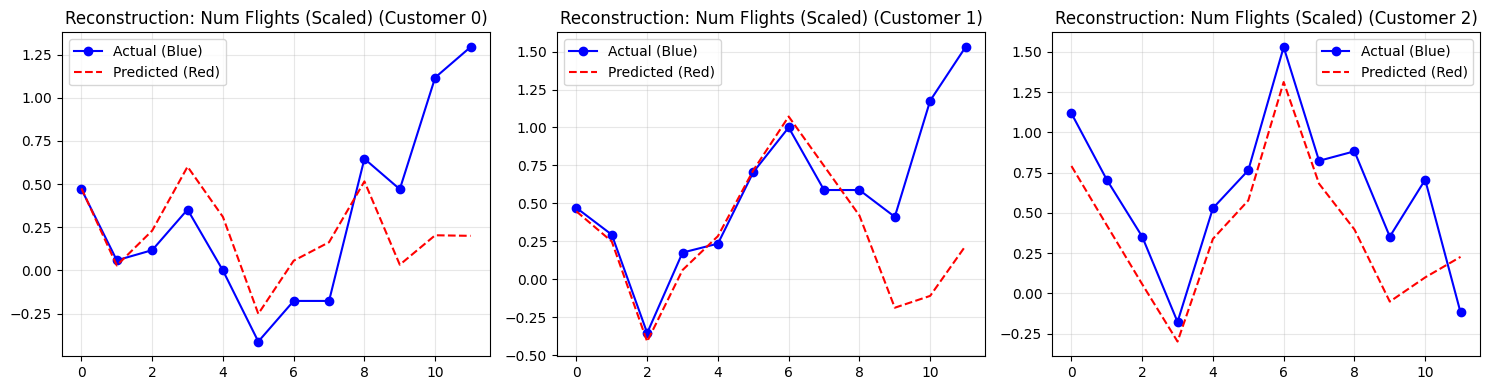

Latent Dimension Variances:
[0.032  0.0328 0.0445 0.0416 0.0145 0.0316 0.0433 0.0175 0.0424 0.0435
 0.1632 0.0315 0.0597 0.0398 0.0533 0.0258 0.0209 0.0377 0.0454 0.0383
 0.0371 0.0275 0.025  0.0413]


In [16]:
# 1. Get a batch of data
model.eval()
with torch.no_grad():
    sample_static, sample_temporal = next(iter(dataloader))
    sample_static, sample_temporal = sample_static.to(device), sample_temporal.to(device)
    
    # 2. Predict
    rec_static, rec_temporal, z = model(sample_static, sample_temporal)

# 3. Visualization Function
def plot_reconstruction(feature_idx, feature_name, sample_idx=0):
    # Extract specific feature for one customer (12 months)
    actual = sample_temporal[sample_idx, :, feature_idx].cpu().numpy()
    predicted = rec_temporal[sample_idx, :, feature_idx].cpu().numpy()
    
    plt.plot(actual, label='Actual (Blue)', color='blue', marker='o')
    plt.plot(predicted, label='Predicted (Red)', color='red', linestyle='--')
    plt.title(f"Reconstruction: {feature_name} (Customer {sample_idx})")
    plt.legend()
    plt.grid(True, alpha=0.3)

# 4. Plot 3 random customers for 'num_flights_scaled' (Index 0)
plt.figure(figsize=(15, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_reconstruction(0, "Num Flights (Scaled)", sample_idx=i)

plt.tight_layout()
plt.show()

# 5. Check Latent Space Activity
z_numpy = z.cpu().numpy()
print("Latent Dimension Variances:")
print(np.var(z_numpy, axis=0).round(4))

## 7. Generate Embeddings and Clustering

In [17]:
# === EXTRACT EMBEDDINGS ===

model.eval()
with torch.no_grad():
    full_static = t_static.to(device)
    full_temporal = t_temporal.to(device)
    
    _, _, latent_vectors = model(full_static, full_temporal)
    X_embedding = latent_vectors.cpu().numpy()

print(f"Final Embedding Shape: {X_embedding.shape}")
print(f"✅ Embeddings extracted successfully")

Final Embedding Shape: (16574, 24)
✅ Embeddings extracted successfully


Applying UMAP dimensionality reduction...
UMAP projection shape: (16574, 2)


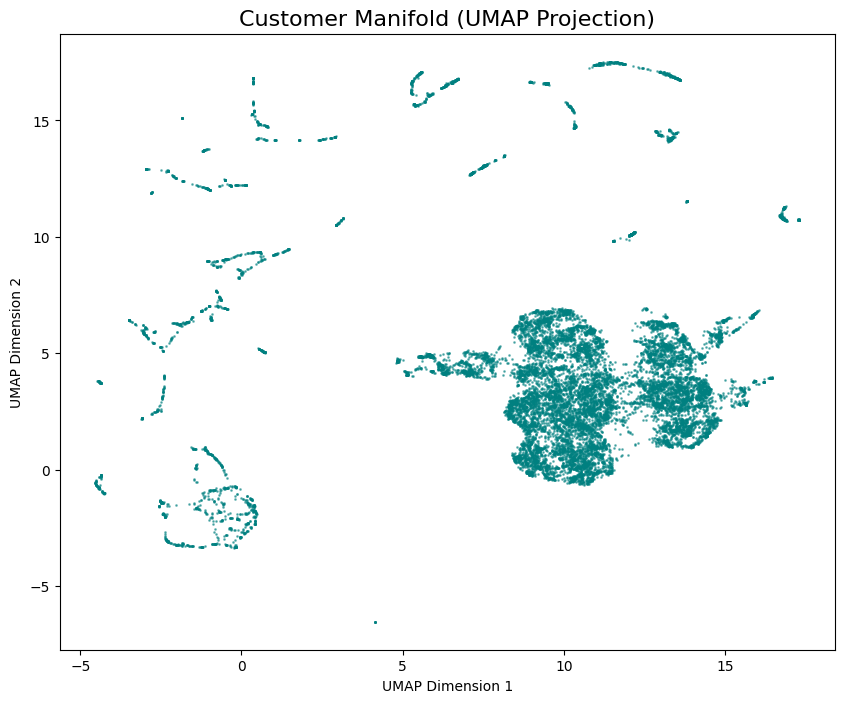

In [18]:
# === UMAP DIMENSIONALITY REDUCTION ===
UMAP_NEIGHBORS = 10
UMAP_MIN_DIST = 0.01
print("Applying UMAP dimensionality reduction...")
reducer = umap.UMAP(n_neighbors=UMAP_NEIGHBORS, min_dist=UMAP_MIN_DIST, n_components=2, random_state=RANDOM_STATE, metric = "cosine")
X_umap = reducer.fit_transform(X_embedding)

print(f"UMAP projection shape: {X_umap.shape}")

# Visualize the UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=1, alpha=0.5, c='teal')
plt.title("Customer Manifold (UMAP Projection)", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

Extracting Physics Vectors...
Clustering Matrix Shape: (16574, 31)
Running Forced-Physics Clustering (K=4)...
--- GENERATING SPLIT CLUSTER DNA ---


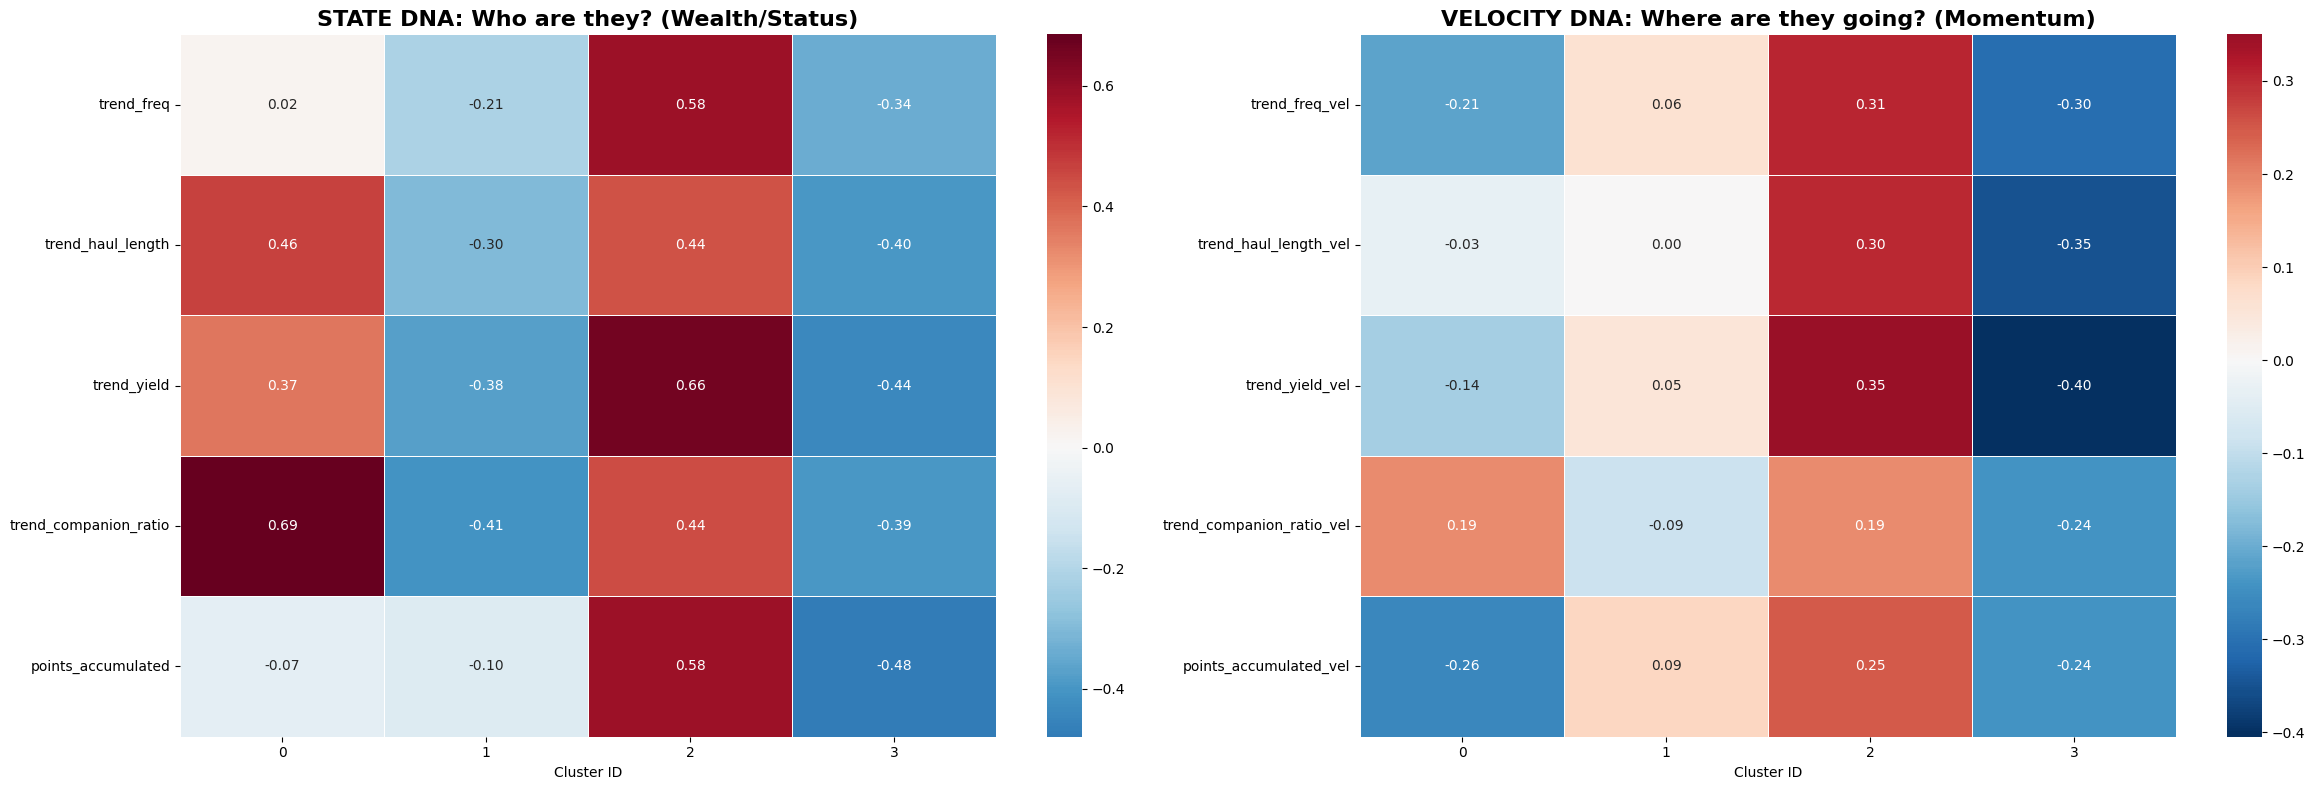

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def analyze_cluster_dna_split(X_temporal, cluster_labels, feature_list, valid_ids):
    print("--- GENERATING SPLIT CLUSTER DNA ---")
    
    # 1. Extract Data (Last Time Step)
    n_feats = len(feature_list)
    current_data = X_temporal[:, -1, :] 
    
    # 2. Create DataFrame
    col_names = feature_list + [f"{f}_vel" for f in feature_list]
    df_dna = pd.DataFrame(current_data, columns=col_names)
    df_dna['Cluster'] = cluster_labels
    
    # 3. Z-Score Standardization
    numeric_cols = df_dna.columns.drop(['Cluster'])
    df_z = df_dna.copy()
    df_z[numeric_cols] = StandardScaler().fit_transform(df_dna[numeric_cols])
    
    # 4. Filter & Split Columns
    # Remove Seasonality (Summer/Winter) as requested
    valid_cols = [c for c in numeric_cols if 'summer' not in c and 'winter' not in c]
    
    # Split into State vs Velocity
    state_cols = [c for c in valid_cols if '_vel' not in c]
    vel_cols = [c for c in valid_cols if '_vel' in c]
    
    # 5. Aggregate
    cluster_profile = df_z.groupby('Cluster')[valid_cols].mean()
    
    # --- VISUALIZATION: SIDE-BY-SIDE HEATMAPS ---
    fig, axes = plt.subplots(1, 2, figsize=(24, 8))
    
    # Common Args for Heatmaps (Removed 'cbar' from here to avoid conflict)
    heatmap_args = dict(
        cmap='RdBu_r', 
        center=0, 
        annot=True, 
        fmt='.2f', 
        linewidths=.5
    )
    
    # A. STATE HEATMAP
    sns.heatmap(cluster_profile[state_cols].T, ax=axes[0], cbar=True, **heatmap_args)
    axes[0].set_title("STATE DNA: Who are they? (Wealth/Status)", fontsize=16, fontweight='bold')
    axes[0].set_xlabel("Cluster ID")
    axes[0].set_ylabel("")
    
    # B. VELOCITY HEATMAP
    sns.heatmap(cluster_profile[vel_cols].T, ax=axes[1], cbar=True, **heatmap_args)
    axes[1].set_title("VELOCITY DNA: Where are they going? (Momentum)", fontsize=16, fontweight='bold')
    axes[1].set_xlabel("Cluster ID")
    axes[1].set_ylabel("")

    plt.tight_layout()
    plt.show()
    
    return cluster_profile

# 1. Get the Latent Z (The State/Identity)
model.eval()
z_list = []
vel_list = []

print("Extracting Physics Vectors...")
with torch.no_grad():
    for batch_s, batch_t in dataloader:
        batch_s, batch_t = batch_s.to(device).float(), batch_t.to(device).float()
        
        # Get Z
        _, _, z = model(batch_s, batch_t)
        z_list.append(z.cpu().numpy())
        
        # Get the VELOCITY part of the input (The Momentum)
        # Assuming batch_t is (Batch, 12, Feats*2)
        n_feats = batch_t.shape[2] // 2
        
        # We take the AVERAGE velocity over the history to get a robust trend
        # shape: (Batch, Features)
        velocities = batch_t[:, :, n_feats:].mean(dim=1) 
        vel_list.append(velocities.cpu().numpy())

X_z = np.vstack(z_list)
X_vel = np.vstack(vel_list)

# 2. WEIGHTING (The "Nuclear Option")
# We Standardize both first so they are on the same scale
X_z_norm = StandardScaler().fit_transform(X_z)
X_vel_norm = StandardScaler().fit_transform(X_vel)

# AMPLIFY VELOCITY
# We multiply velocity by 3.0 to make it 3x more important than State
VELOCITY_WEIGHT = 3.0 
X_clustering_forced = np.hstack([X_z_norm, X_vel_norm * VELOCITY_WEIGHT])

print(f"Clustering Matrix Shape: {X_clustering_forced.shape}")

# === STEP 2: CLUSTER WITH K=4 (STRICT) ===
print("Running Forced-Physics Clustering (K=4)...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50)
forced_labels = kmeans.fit_predict(X_clustering_forced)

df_dna_results = analyze_cluster_dna_split(X_temporal, forced_labels, temporal_features, valid_ids)

# Part II: Clustering-Based Recommender System

In standard recommender systems (e.g., Matrix Factorization), the latent space is often assumed to be continuous and convex—meaning any point between User A and User B is a valid theoretical user.

In our Multi-Modal Customer Manifold, this assumption is false. The state space is discontinuous and non-convex. The valid configurations of "Customer Identity" (Static) and "Customer Behavior" (Temporal) are governed by strict business rules, market dynamics, and sociology.

## Assumption 1: Ghost archetypes and unfeasible transitions

We model the system as a collection of observed local manifolds (dense clusters). A transition is only valid if it traverses through regions of high local density. Low-density regions represent Structural Voids (impossible states).

**What does this mean in practice**
Using traditional methods we interpolate (averaging) sets of solutions and archetypes that aren't real.

| Profile A: The Solo Consultant | Linear Average | Profile B: The Summer Family |
|--------------------------------|----------------|------------------------------|
| **Companions:** 0 (Travels Alone) | **1.5 People** | **Companions:** 3 (Spouse + 2 Kids) |
| **Timing:** Tue/Wed (Mid-week) | **Thursday in October** | **Timing:** July/Aug (School Break) |
| **Duration:** 1 Night | **7.5 Nights** | **Duration:** 14 Nights |
| **Motivation:** Client Meeting | **???** | **Motivation:** Annual Vacation |

**Asymmetry constraints**
Even if a theoretical path existed, transitions on the manifold are often **strictly directional**.

| **Transition** | **Feasibility** | **Explanation** |
|----------------|-----------------|-----------------|
| **A → B** (Consultant → Family) | ✅ **Feasible** | Solo consultant can take a family vacation. We can cross-sell leisure packages. |
| **B → A** (Family → Consultant) | ❌ **Unfeasible** | Summer family traveler cannot suddenly acquire a corporate job requiring weekly travel just because we sent a promotion. |


## Assumption 2: Replacing euclidean distance with geodesics

Euclidean distance measures the shortest path through the ambient space. In the its manifold representation, high spend might be inextricably coupled with high frequency (due to loyalty tier bonuses). You cannot simply increase one variable without the other dragging along. The variables are covariant.

A **Geodesic** is the locally length-minimizing curve constrained to the surface of the manifold. It represents the natural evolution of a customer profile given the correlations in the data (the local topology constraints).

### Geodesics represent causality and natural lifecycles

To move from Start to Aurora status, the geodesic path might force the customer to first increase Frequency (Cluster A -> Cluster B) before they can increase Yield (Cluster B -> Cluster C). This manifold represents both causality (increase in flight frequency/haul leads to increased Yield) and natural lifecycles (its unfeasible to increase yield first, frequency later or both simultaneously).

## Assumption 3: Local density as feasibility (uncertainty)

We utilize the local density of the latent space, ρ(z), estimated via k-Nearest Neighbors (k-NN), as a proxy for Transition Probability.

P(transition∣z) ∝ ρ(z)

- **High Density:** A well-trodden path. Many customers have existed in this state. The uncertainty of behavior here is low.
- **Low Density (Voids):** High uncertainty. If we push a customer into this region, we don't know if they will churn or thrive because we have no historical precedent. It is a "High Entropy" state.

## Hyperpersonalized marketing using Customer physics

This is the core of our "Prescriptive" model. We treat the customer as a **particle with mass (inertia)** moving through a **vector field** (trends).

A customer has a **natural trajectory (Inertia)**. If we do nothing, they will follow the flow of their current cluster (e.g., slow decay towards churn or stable orbit). To change their state, we must apply an **Exogenous Force**. **Marketing = Energy.**

The total energy E required to traverse a path γ is defined not just by distance, but by the resistance to change:

$$ E_{total} = \sum_{t=0}^{T} \left( \underbrace{|| \vec{v}_{t+1} - \vec{v}_t ||^2}_{\text{Change in Velocity}} + \underbrace{\frac{1}{\rho(z_t)}}_{\text{Resistance of Void}} + \underbrace{\theta \cdot (1 - \cos(\phi))}_{\text{Change in Direction}} \right) $$


- **Change in Velocity:** It takes energy to accelerate a customer (make them fly more).
- **Change in Direction:** It takes significantly more energy to change a customer's type (e.g., converting a Leisure flyer to a Business flyer) than to simply accelerate their current behavior.
- **Resistance (Sparsity):** Moving a customer into a rare behavioral bucket requires massive incentives (Energy) because it is unnatural.
## Solution: Dijkstra on the k-NN Graph bound by clusters

We solve this using Dijkstra's Algorithm (or A* with a manifold-aware heuristic) on a graph constructed from the embeddings. Dijkstra naturally navigates around "holes" in the graph. If a direct Euclidean path is blocked by a void (no edges), Dijkstra will find the optimal detour through valid customer states.

## Energy Minimization Path vs. Geodesic Path

**Geodesic Path**: Minimize the cumulative change in the vector state.
**Energy Minimzation**: Minimize the External Force required. (natural path)

We solve for the Energy Minimization Path. We want to guide them through a sequence of natural intermediate clusters—the "Golden Path"—where each step requires minimal marketing spend (Low Energy).

In [24]:

def generate_aligned_physics_labels(model, X_static, X_temporal, device):
    """
    1. Extracts embeddings in strict sequential order (Fixes Shuffle Bug).
    2. Weights Velocity 3x higher than State (Enforces Physics).
    3. Clusters into 4 Behavioral Regimes.
    """
    print("--- GENERATING ALIGNED PHYSICS CLUSTERS ---")
    
    # 1. CREATE SEQUENTIAL DATALOADER
    # X_static and X_temporal are already sorted by 'valid_ids' from the build function.
    # We must set shuffle=False to preserve this order.
    tensor_s = torch.FloatTensor(X_static)
    tensor_t = torch.FloatTensor(X_temporal)
    
    seq_dataset = TensorDataset(tensor_s, tensor_t)
    seq_loader = DataLoader(seq_dataset, batch_size=256, shuffle=False) # <--- CRITICAL FIX

    # 2. EXTRACT VECTORS
    model.eval()
    z_list = []
    vel_list = []

    print("Extracting vectors (Sequential)...")
    with torch.no_grad():
        for batch_s, batch_t in seq_loader:
            batch_s, batch_t = batch_s.to(device), batch_t.to(device)
            
            # Get Latent Z (State/Identity)
            _, _, z = model(batch_s, batch_t)
            z_list.append(z.cpu().numpy())
            
            # Get Velocity (Momentum)
            # Input format: (Batch, 12, Feats*2). 
            # First half = State, Second half = Velocity.
            n_feats = batch_t.shape[2] // 2
            
            # We take the MEAN velocity over history to get the robust trend
            velocities = batch_t[:, :, n_feats:].mean(dim=1)
            vel_list.append(velocities.cpu().numpy())

    X_z_ordered = np.vstack(z_list)
    X_vel_ordered = np.vstack(vel_list)

    # 3. NORMALIZE & WEIGHT
    print(f"Weighting Velocity by {VELOCITY_WEIGHT}x...")
    
    # Standardize both to Z-scores first so they compete fairly
    scaler_z = StandardScaler()
    scaler_v = StandardScaler()
    
    X_z_std = scaler_z.fit_transform(X_z_ordered)
    X_vel_std = scaler_v.fit_transform(X_vel_ordered)
    
    # Create the "Physics Matrix": Z + (Velocity * Weight)
    X_clustering_forced = np.hstack([X_z_std, X_vel_std * VELOCITY_WEIGHT])

    # 4. CLUSTER
    print(f"Clustering into {N_CLUSTERS} regimes...")
    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=50)
    aligned_labels = kmeans.fit_predict(X_clustering_forced)
    
    print("✅ Labels Generated. Alignment matches 'valid_ids'.")
    return aligned_labels

# === EXECUTION ===
# Ensure X_static and X_temporal are the outputs from 'build_phase_space_dataset'
aligned_labels = generate_aligned_physics_labels(model, X_static, X_temporal, device)

--- GENERATING ALIGNED PHYSICS CLUSTERS ---
Extracting vectors (Sequential)...
Weighting Velocity by 3.0x...
Clustering into 4 regimes...
✅ Labels Generated. Alignment matches 'valid_ids'.


In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import shortest_path
from sklearn.decomposition import TruncatedSVD  # Changed from PCA

class GoldenPathVisualizer:
    def __init__(self, model, X_embedding, X_static, X_temporal, valid_ids, df_static, aligned_labels, feature_list, device):
        self.model = model
        self.X_z = X_embedding
        self.X_static = X_static
        self.X_temporal = X_temporal
        self.ids = list(valid_ids)
        self.labels = aligned_labels
        self.df_static = df_static.set_index('loyalty_id')
        self.feature_list = feature_list 
        self.device = device
        
        print("Mapping Manifold Physics...")
        self.knn = NearestNeighbors(n_neighbors=30, metric='euclidean').fit(self.X_z)
        dists, _ = self.knn.kneighbors(self.X_z)
        self.sparsity = dists.mean(axis=1)
        self.adj_matrix = self.knn.kneighbors_graph(self.X_z, mode='distance')

    def _calculate_latent_velocity(self, idx):
        s_input = torch.tensor(self.X_static[idx:idx+1]).float().to(self.device)
        t_input = torch.tensor(self.X_temporal[idx:idx+1]).float().to(self.device)
        n_feats = t_input.shape[2] // 2
        
        t_future = t_input.clone()
        current_state = t_input[:, -1, :n_feats]
        current_vel = t_input[:, -1, n_feats:]
        t_future[:, -1, :n_feats] = current_state + current_vel
        
        self.model.eval()
        with torch.no_grad():
            _, _, z_curr = self.model(s_input, t_input)
            _, _, z_fut = self.model(s_input, t_future)
            if isinstance(z_curr, tuple): z_curr = z_curr[2]
            if isinstance(z_fut, tuple): z_fut = z_fut[2]

        return (z_fut - z_curr).cpu().numpy()[0]
    
    def _calculate_strategic_gap(self, start_idx, target_idx):
        n_feats = len(self.feature_list)
        current_state = self.X_temporal[start_idx, -1, :n_feats]
        target_state = self.X_temporal[target_idx, -1, :n_feats]
        gap_vector = target_state - current_state
        return gap_vector

    def _get_distinct_aurora_targets(self, n_targets=3):
        target_indices = np.where(self.df_static.reset_index()['LoyaltyStatus'] == 'Aurora')[0]
        aurora_z = self.X_z[target_indices]
        kmeans = KMeans(n_clusters=n_targets, random_state=42, n_init=10)
        kmeans.fit(aurora_z)
        distinct_target_indices = []
        for center in kmeans.cluster_centers_:
            dists = np.linalg.norm(aurora_z - center, axis=1)
            closest_local_idx = np.argmin(dists)
            distinct_target_indices.append(target_indices[closest_local_idx])
        return distinct_target_indices

    def visualize_journey(self, candidate_id, n_alternatives=2):
        try: start_idx = self.ids.index(candidate_id)
        except: return print("ID not found.")

        # --- SUBPLOT SETUP ---
        fig = make_subplots(
            rows=2, cols=2,
            row_heights=[0.6, 0.4],
            specs=[[{'type': 'scene', 'colspan': 2}, None],
                   [{'type': 'xy'}, {'type': 'polar'}]],
            subplot_titles=(
                "Enhanced 3D Manifold Journey (Neural Wireframe)", 
                "Energy Composition (Cost Decomposition)", 
                "Strategic Gap (Target - Current)"
            ),
            vertical_spacing=0.1
        )

        target_idxs = self._get_distinct_aurora_targets(n_targets=n_alternatives + 1)
        _, predecessors = shortest_path(
            csgraph=self.adj_matrix, method='D', directed=False, 
            indices=[start_idx], return_predecessors=True
        )

        # Colors compatible with Dark Mode
        colors = ['#00FFFF', '#FFA500', '#FF69B4'] # Cyan, Orange, Pink
        names = ['Optimal Path', 'Alt Path A', 'Alt Path B']

        paths = []
        for i, t_idx in enumerate(target_idxs):
            path = []
            curr = t_idx
            while curr != -9999:
                path.append(curr)
                if curr == start_idx: break
                curr = predecessors[0, curr]
            
            if curr == -9999 and path[-1] != start_idx: continue
            path = path[::-1]
            
            # --- PHYSICS ENGINE ---
            path_vecs = self.X_z[path]
            deltas = np.diff(path_vecs, axis=0)
            step_dists = np.linalg.norm(deltas, axis=1)
            
            path_sparsity = self.sparsity[path]
            avg_sparsity = (path_sparsity[:-1] + path_sparsity[1:]) / 2
            void_penalty = step_dists * (avg_sparsity * 5.0)
            
            turn_penalties = np.zeros(len(step_dists))
            if len(deltas) > 1:
                norms = np.linalg.norm(deltas, axis=1, keepdims=True)
                norms[norms == 0] = 1.0
                dirs = deltas / norms
                cos_sims = np.sum(dirs[:-1] * dirs[1:], axis=1)
                turn_costs = (1.0 - cos_sims) * 2.0
                turn_penalties[1:] = turn_costs

            step_total = step_dists + void_penalty + turn_penalties
            cum_energy = np.insert(np.cumsum(step_total), 0, 0.0)
            
            steering = self._calculate_strategic_gap(start_idx, path[-1])

            paths.append({
                'idx': i,
                'path_indices': path,
                'total_energy': cum_energy[-1],
                'cum_energy': cum_energy,
                'comp_kinetic': np.insert(step_dists, 0, 0.0),
                'comp_void': np.insert(void_penalty, 0, 0.0),
                'comp_turn': np.insert(turn_penalties, 0, 0.0),
                'steering': steering
            })

        paths = sorted(paths, key=lambda x: x['total_energy'])
        
        # --- 3D ENVIRONMENT GENERATION (Replaced with Enhanced SVD Logic) ---
        
        # 1. Gather all points involved (Paths + Context)
        all_path_indices = np.concatenate([p['path_indices'] for p in paths])
        # Get a wider context "Tube"
        _, context_idx = self.knn.kneighbors(self.X_z[all_path_indices], n_neighbors=35)
        universe_idx = np.unique(context_idx.flatten())
        universe_vecs = self.X_z[universe_idx]
        
        # 2. SVD Projection (Better for local manifold than PCA)
        svd = TruncatedSVD(n_components=3, random_state=42)
        svd_tube = svd.fit_transform(universe_vecs)
        
        # Map global indices to SVD coordinates
        id_map = {orig: i for i, orig in enumerate(universe_idx)}
        
        # 3. Generate Wireframe (Neural Pathways)
        # We calculate local connectivity within the SVD space for visuals
        tube_knn = NearestNeighbors(n_neighbors=6).fit(universe_vecs)
        distances, neighbors = tube_knn.kneighbors(universe_vecs)
        
        x_lines, y_lines, z_lines = [], [], []
        # Build line segments
        for i in range(len(universe_vecs)):
            for j_idx, j in enumerate(neighbors[i]):
                # Only draw lines if reasonably close (create organic web)
                if distances[i][j_idx] < np.percentile(distances.flatten(), 80):
                    x_lines.extend([svd_tube[i,0], svd_tube[j,0], None])
                    y_lines.extend([svd_tube[i,1], svd_tube[j,1], None])
                    z_lines.extend([svd_tube[i,2], svd_tube[j,2], None])

        # --- PLOT 3D SCENE (Top Row) ---
        
        # A. Wireframe (The Web)
        fig.add_trace(go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='rgba(64, 224, 255, 0.1)', width=1),
            hoverinfo='skip',
            name='Neural Pathways'
        ), row=1, col=1)
        
        # B. Nodes (Context Points) - Sized by Connectivity
        node_sizes = np.array([len(neighbors[i]) for i in range(len(universe_vecs))])
        # Normalize size 2-6
        node_sizes = 2 + (node_sizes - node_sizes.min()) * 4 / (node_sizes.max() - node_sizes.min() + 1)
        
        fig.add_trace(go.Scatter3d(
            x=svd_tube[:,0], y=svd_tube[:,1], z=svd_tube[:,2],
            mode='markers',
            marker=dict(
                size=node_sizes,
                color='rgba(100, 200, 255, 0.4)',
                colorscale='Viridis'
            ),
            hoverinfo='skip',
            showlegend=False
        ), row=1, col=1)

        # C. The Paths
        for k, p in enumerate(paths):
            color = colors[p['idx'] % 3]
            # Map path indices to new SVD coordinates
            path_coords = np.array([svd_tube[id_map[idx]] for idx in p['path_indices']])
            
            # Draw Path Line
            fig.add_trace(go.Scatter3d(
                x=path_coords[:,0], y=path_coords[:,1], z=path_coords[:,2],
                mode='lines+markers',
                line=dict(color=color, width=8 if k==0 else 4),
                marker=dict(size=4, color=color),
                name=f"{names[p['idx']%3]}"
            ), row=1, col=1)
            
            # Draw Target
            end_pt = path_coords[-1]
            fig.add_trace(go.Scatter3d(
                x=[end_pt[0]], y=[end_pt[1]], z=[end_pt[2]],
                mode='markers+text', text=[f"Target {k+1}"], textposition='top center',
                marker=dict(size=8, color=color, symbol='diamond', line=dict(width=2, color='white')),
                showlegend=False
            ), row=1, col=1)

        # D. Start & Momentum
        start_svd = svd_tube[id_map[start_idx]]
        
        # Project velocity into SVD space
        latent_vel = self._calculate_latent_velocity(start_idx)
        # We need to transform (Start + Vel) then subtract Start_SVD to get vector
        tip_raw = self.X_z[start_idx] + latent_vel
        tip_svd = svd.transform(tip_raw.reshape(1, -1))[0]
        vec_3d = tip_svd - start_svd
        vec_3d = vec_3d * 2.0 # Scale up

        # Arrow Head (Cone)
        fig.add_trace(go.Cone(
            x=[start_svd[0] + vec_3d[0]], y=[start_svd[1] + vec_3d[1]], z=[start_svd[2] + vec_3d[2]],
            u=[vec_3d[0]], v=[vec_3d[1]], w=[vec_3d[2]],
            sizemode="absolute", sizeref=0.2, anchor="tail", 
            showscale=False, colorscale=[[0,'white'],[1,'white']],
            name="Momentum"
        ), row=1, col=1)
        
        # Arrow Shaft
        fig.add_trace(go.Scatter3d(
            x=[start_svd[0], start_svd[0] + vec_3d[0]],
            y=[start_svd[1], start_svd[1] + vec_3d[1]],
            z=[start_svd[2], start_svd[2] + vec_3d[2]],
            mode='lines', line=dict(color='white', width=6), showlegend=False
        ), row=1, col=1)

        # You
        fig.add_trace(go.Scatter3d(
            x=[start_svd[0]], y=[start_svd[1]], z=[start_svd[2]],
            mode='markers+text', text=['YOU'], textposition='bottom center',
            marker=dict(size=12, color='white', symbol='circle', line=dict(width=2, color='cyan')),
            showlegend=False
        ), row=1, col=1)

        # --- PLOT ANALYTICS (Bottom Row) ---
        
        # 1. Stacked Energy (Best Path)
        p_opt = paths[0]
        x_vals = np.arange(len(p_opt['comp_kinetic']))
        
        fig.add_trace(go.Scatter(
            x=x_vals, y=p_opt['comp_kinetic'], mode='lines', name='Kinetic (Dist)',
            stackgroup='one', line=dict(width=0), fillcolor='rgba(0, 255, 255, 0.3)'
        ), row=2, col=1)
        
        fig.add_trace(go.Scatter(
            x=x_vals, y=p_opt['comp_void'], mode='lines', name='Void (Risk)',
            stackgroup='one', line=dict(width=0), fillcolor='rgba(255, 0, 0, 0.4)'
        ), row=2, col=1)
        
        fig.add_trace(go.Scatter(
            x=x_vals, y=p_opt['comp_turn'], mode='lines', name='Inertia (Turn)',
            stackgroup='one', line=dict(width=0), fillcolor='rgba(255, 255, 0, 0.4)'
        ), row=2, col=1)

        # 2. Spider Chart (Steering)
        all_steering = np.concatenate([p['steering'] for p in paths])
        max_steer = np.max(np.abs(all_steering)) * 1.1

        for k, p in enumerate(paths):
            color = colors[p['idx'] % 3]
            name = names[p['idx'] % 3]
            
            r_vals = np.concatenate([p['steering'], [p['steering'][0]]])
            theta_vals = self.feature_list + [self.feature_list[0]]
            
            fig.add_trace(go.Scatterpolar(
                r=r_vals, theta=theta_vals,
                mode='lines+markers', name=f"{name}",
                line=dict(color=color), opacity=0.8,
                showlegend=False
            ), row=2, col=2)

        # --- FINAL LAYOUT ---
        fig.update_layout(
            title=f"<b>Enhanced Manifold Physics: {candidate_id}</b>",
            template="plotly_dark",
            margin=dict(l=10, r=10, b=10, t=60),
            height=900,
            scene=dict(
                xaxis_visible=False, yaxis_visible=False, zaxis_visible=False,
                bgcolor='rgba(0,0,0,0.9)' # Darker background for 3D
            ),
            polar=dict(
                radialaxis=dict(visible=True, range=[-max_steer, max_steer], gridcolor='#444'),
                angularaxis=dict(gridcolor='#444'),
                bgcolor='rgba(0,0,0,0)'
            )
        )
        
        fig.update_xaxes(title_text="Step Sequence", row=2, col=1)
        fig.update_yaxes(title_text="Cost Component", row=2, col=1)

        return fig

# === RUN ===
viz = GoldenPathVisualizer(model, X_embedding, X_static, X_temporal, valid_ids, df_static, aligned_labels, temporal_features, device)

cand_id = valid_ids[1000]
fig = viz.visualize_journey(cand_id, n_alternatives=2)
fig.show()

Mapping Manifold Physics...
